## Importing Libraries

In [68]:
import sys
import time
import glob
import codecs
import matplotlib.pyplot as plt
import requests
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading Corpus

In [69]:
# Books present
books = sorted(glob.glob("data/harrypotter/*.txt"))

print "Available Books: \n"
for i in books:
    print i.split("/")[2].split("_")[0]

# Read data from all books to single corpus variable
temp = ""
t = ""
chars = []
book_raw = []
for book in books:
    with codecs.open(book, "rb", "utf-8") as infile:
        temp = infile.read()
        book_raw.append(temp)

Available Books: 

Book 1 - The Philosopher's Stone
Book 2 - The Chamber of Secrets
Book 3 - The Prisoner of Azkaban
Book 4 - The Goblet of Fire
Book 5 - The Order of the Phoenix
Book 6 - The Half Blood Prince
Book 7 - The Deathly Hallows


## Calling the API

In [70]:
def get_readability_score(data):
    """
    Sends a POST request to FORMCEPT's Text Redability API
    """
    endpoint = 'http://<fchost>:<fcport>/fc/readability'
    text = data
    payload = {'txt_readability': text}
    headers = {'Content-type': 'application/json', 'Accept': 'application/json'}
    r = requests.post(endpoint, json = payload, headers = headers)
    return r.json()['response']

In [71]:
# get readability score for each of the 7 parts of the Harry Potter Book
readability_scores = []
for book in range(len(book_raw)):
    readability_scores.append(get_readability_score(book_raw[book].strip().lower().replace("\n"," ").replace("\t"," ").replace("\r", " ")))

## Plotting Bookwise Readability Score

1. <b>Less</b> the score the <b>more readabile</b> the text. 
2. <b>More</b> the score the <b>difficult</b> the text.

<Container object of 7 artists>

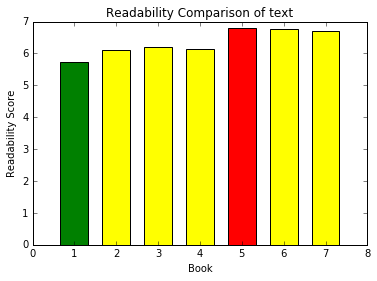

In [72]:
y = readability_scores
N = len(y)
x = [i+1 for i in range(N)]
width = 1/1.5

mini = min(readability_scores)
maxi = max(readability_scores)

pylab.title("Readability Comparison of text")
pylab.xlabel("Book")
pylab.ylabel("Readability Score")

colors = ["yellow"]*7
colors[readability_scores.index(mini)] = "green"
colors[readability_scores.index(maxi)] = "red"
plt.bar(x, y, width, align='center', color=colors)